# O Algoritmo Deutsch-Jozsa

## Uma Breve História:

## Explicação Teórica e Matemática:

Segundo o circuito, temos:

$$
|\psi_0\rangle = |0\rangle^{\otimes^n}|1\rangle
$$

Chamemos o vetor de 0s de $|x\rangle$. Aplicando Hadamard aos $n$ bits desse vetor, ficamos com:

$$
H^{\otimes^n} |x\rangle = \frac{1}{\sqrt{2^n}}\sum_{x}|x\rangle
$$

Fazendo o mesmo com $|1\rangle$, colocamos todos os qubits da entrada em superposição, obtendo assim:

$$
|\psi_1\rangle = \frac{1}{\sqrt{2^n}}\sum_{x}|x\rangle \frac{[|0\rangle - |1\rangle]}{\sqrt{2}}
$$

Agora, $U_{f}$ entra em ação, que devolve:

$$
|\psi_2\rangle = \frac{1}{\sqrt{2^n}}\sum_{x}(-1)^{f(x)}|x\rangle \frac{[|0\rangle - |1\rangle]}{\sqrt{2}}
$$

Para finalizar, aplicamos Hadamard novamente ao vetor de bits, assim:

$$
|\psi_3\rangle = \frac{1}{\sqrt{2^n}}\sum_{x}(-1)^{f(x)}H^{\otimes^n}|x\rangle \frac{[|0\rangle - |1\rangle]}{\sqrt{2}}
$$

Como os bits do vetor $|x\rangle$ já se encontram em, quando o aplicamos novamente, obtemos

$$
\frac{1}{\sqrt{2^n}}\sum_{z}(-1)^{<x,z>}|z\rangle
$$

Uma superposição de uma superposição!

Juntando tudo, enfim ficamos com:

$$
|\psi_3\rangle = \frac{1}{\sqrt{2^n}}\sum_{x}(-1)^{f(x)}\sum_{z}\frac{1}{\sqrt{2^n}}(-1)^{<x,z>}|z\rangle \frac{[|0\rangle - |1\rangle]}{\sqrt{2}}
$$

Rearranjando:

$$
|\psi_3\rangle = \frac{1}{2^n}\sum_{z}\sum_{x}(-1)^{f(x) + <x,z>}|z\rangle \frac{[|0\rangle - |1\rangle]}{\sqrt{2}}
$$

## Importações Úteis

In [30]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit import ClassicalRegister
from qiskit import QuantumRegister
from qiskit import execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram

## Circuito

In [21]:
#Criação de um registro quântico com 3 bits
q = QuantumRegister(3, 'q')

#Criação de um circuito quântico agindo no registro q
circuito = QuantumCircuit(q)

## Exemplo Simulado:

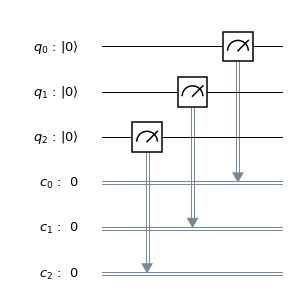

In [36]:
#Criação de um circuito clássico com 3 bits
c = ClassicalRegister(3, 'c')

#Criação de um circuito quântico
quant = QuantumCircuit(q, c)
quant.barrier(q)

#Mapeamento da medição dos qubits para os bits clássicos
quant.measure(q, c)

qc = circuito + quant

circuit_drawer(qc)

## Exemplo Real:

Verificação dos computadores reais disponíveis:

In [54]:
from qiskit import IBMQ
#IBMQ.save_account('4854f480717fc1c972ca7c3020ed573ac7cf5d2eb91eccfdda886894c5da8b6c2fe7438ddcdc975df7bf0ce70ea008165054f48d9a34ad97286b94ac70196506')
#IBMQ.load_accounts()
print("Backends disponíveis:")
IBMQ.backends()

Backends disponíveis:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx5') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

O tempo de espera de uma simulação em um computador quântico real pode ser desconfortavelmente grande. A fila para acessar um deles pode estar imensa em dado momento. Uma opção de minimizar o tempo de espera é importarmos a função 'least_busy', que verifica qual dos backends atuais estão menos ocupados.

In [6]:
from qiskit.backends.ibmq import least_busy

dispositivo = IBMQ.backends(filters = lambda x: x.configuration()['n_qubits'] > 3 and not x.configuration()['simulator'])

backend = least_busy(dispositivo)

print("O melhor é " + backend.name())

O melhor é ibmqx4


Sabendo qual deles está menos ocupado no momento, salvamos essa informação na variável $backend$ para, enfim, rodarmos nossa simulação em um dispositivo real.

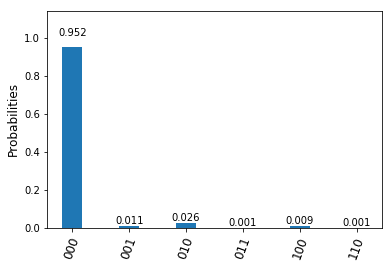

In [51]:
from qiskit.backends import jobstatus
import time

shots = 1000
creditos = 3
tarefa = execute(qc, backend = backend, shots = shots, max_credits = creditos)

'''k = 0
passo = 10

while not tarefa.done:
    print(tarefa.status)
    print('Esperando ' + str(k) + ' segundos')
    k += passo
    time.sleep(passo)'''
    
#print(tarefa.status)

resultado = tarefa.result()
contador = resultado.get_counts(qc)

plot_histogram(contador)

## Conclusões: